In [5]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from helper_functions import draw_slinky
%matplotlib inline

### Solve this mass-spring system for a different load

Let's see what happens when we modify the force vector. For now, we will use $N = 10$:

In [6]:
N = 10
Ls  = 10   # (cm)      Length of the slinky
Ks = 700  # (N/cm)     Stiffness
M  = 170  # (grams)    Total mass
m = M/(N+1) # each individual mass
k = Ks*(N)  # each individiual spring stiffness
l = Ls/(N)   # each individual spring length

g = 9.81*10**2 # cm/s^2

# Obtain the stiffness matrix
K = np.load('stiffness.npy')
# Get coordinate positions for the masses
coord = [l*i for i in range(N+1)]
# Obtain force vector f
f_given = np.load('force_vector.npy')

We add some extra masses to the slinky:

<img src="add_mass.png" width=200>

Create a numpy array with shape `(N,)` that contains the forces due to the additional masses and store it as `delta_force`. For example, consider the `delta_force` array resulting from adding one mass of size $2$ at the middle position of the slinky. This mass will contribute a force $2g$ at the middle position of the slinky.

In [7]:
delta_force = np.zeros(N)
delta_force[int(N/2)] = 2*g
delta_force

array([   0.,    0.,    0.,    0.,    0., 1962.,    0.,    0.,    0.,
          0.])

How can we solve this system for the new force vector?

**Try this!**


Complete the code snippet below using the same steps that you used to create the function `solve_slinky`:

- re-define the force vector `f` using `f_given` and `delta_force`
- you already defined the stiffness matrix above
- solve for the displacement `u`
- get the displacement `utotal`

In [18]:
# define the variables here:
f = f_given + delta_force
u = np.linalg.solve(K,f)
utotal = np.append(0,u)

Plot the `coord` and `def_coord` and print out the value of the displacement at the end of the slinky:

17.097428571428576


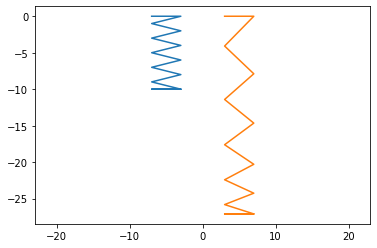

In [19]:
def_coord = coord + utotal

plt.figure()
plt.axis('equal')
draw_slinky(-5, coord, 2)
draw_slinky(5, def_coord, 2)

# check the value of the displacement at the end of the slinky
uend = u[-1]
print(uend)

What if you want to add masses at different locations and get the corresponding displacements?

**Check your answers!**


Complete the function below that takes `delta_force`, `f_given` and `K` as input, and return the value of the displacement at the end.

In [20]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
def solve_varying_force(delta_force, f_given, K):
    # delta_force = increment in the load vector
    # f_given = load vector due to gravity
    # K = stiffness matrix

    # compute displacement at the free end of the slinky
    #u = np.array([0])   # replace np.array([0]) with your computation
    f = f_given + delta_force
    u = np.linalg.solve(K,f)
    utotal = np.append(0,u)
    
    return u[-1]

Print out to check the result computed by your function:

In [34]:
solve_varying_force(delta_force, f_given, K)

Take a look at the code snippet below. It uses the above function to get the end displacement of different (random) options for `delta_force` (you can try running it several times).

In [35]:
def get_slinky(delta_force, f_given, K):
    u=la.solve(K, f_given + delta_force)
    utotal = np.append(0,u)
    return coord + utotal

for i in range(20):
    random_delta_force = np.random.choice([0,1],N)*g
    curr_slinky = get_slinky(random_delta_force, f_given, K)
    draw_slinky(20 * (i -10),curr_slinky, 5)

The function `numpy.linalg.solve` is effectively *inverting* ${\bf K}$ each time we call it.  Can you recall anything you have learned in lecture that can be used here to make your code snippet more efficient?

**You should discuss this with your group, and think about strategies to avoid this unnecessary computational effort.**

In [1]:
import numpy as np
import scipy.linalg as sla

#Step 0: Modify the vector E by appending a zero, so that it looks like the vector E~ above.
E = np.append(E,0)


#Step 1: Create the matrix A.
A = np.zeros((N+1,N+1))
for i in range(N):
    A[i,j] = R[i]
for j in range(N):
    A[-1,j] = -1
for k in range(N):
    A[k,-1] = 1
A[-1,-1] = 0

print(A)


#Step 2: Solve the system AI = E.
I = np.linalg.inv(A) @ E

NameError: name 'E' is not defined